In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"], axis=1, inplace=True)

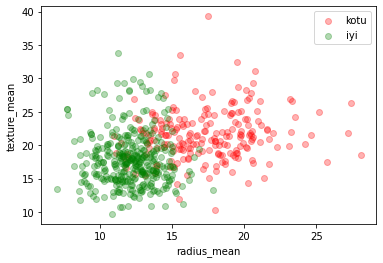

In [2]:
M=data[data.diagnosis == "M"]
B=data[data.diagnosis == "B"]

plt.scatter(M.radius_mean, M.texture_mean, color="red", label="kotu", alpha=0.3)
plt.scatter(B.radius_mean, B.texture_mean, color="green", label="iyi", alpha=0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [3]:
data.diagnosis=[1 if each == "M" else 0 for each in data.diagnosis]
y= data.diagnosis.values
x_data=data.drop(["diagnosis"], axis=1)

In [4]:
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.15, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
print("score: ", dt.score(x_test, y_test))

score:  0.9186046511627907


In [8]:
y_pred=dt.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[52,  2],
       [ 5, 27]], dtype=int64)